In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns #visualisation tool
import os

for dirname, _, filenames in os.walk('/LB1/input'): # List datasets in the working directory
    for filename in filenames:
        print(os.path.join(dirname, filename))

combats = pd.read_csv('/LB1/input/combats.csv') # Reading the second dataset and displaying its head
combats.head()

/LB1/input\combats.csv
/LB1/input\move-data.csv
/LB1/input\test.csv


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
combats.tail()

,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [7]:
combats.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')

In [9]:
combats.shape

(50000, 3)

In [11]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [19]:
print(combats['Winner'].value_counts(dropna = False))

Winner
163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: count, Length: 783, dtype: int64


In [21]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


<Axes: title={'center': 'First_pokemon'}, xlabel='Winner'>

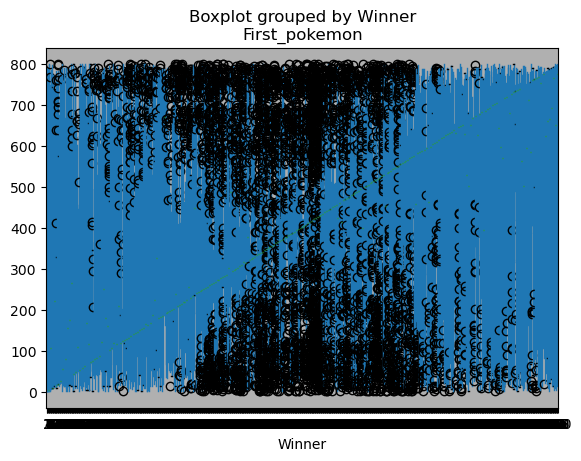

In [25]:
combats.boxplot(column = 'First_pokemon', by = 'Winner')

<Axes: title={'center': 'Second_pokemon'}, xlabel='Winner'>

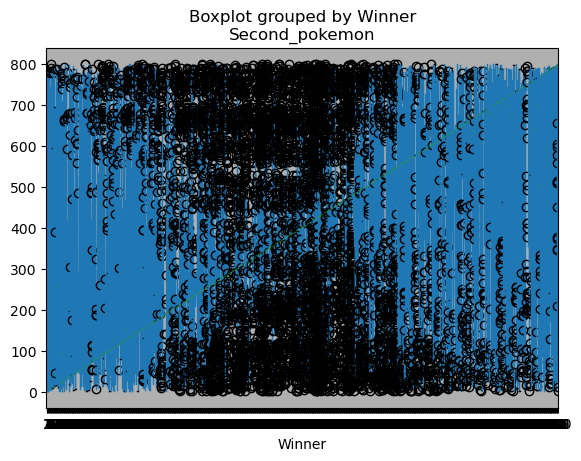

In [27]:
combats.boxplot(column = 'Second_pokemon', by = 'Winner')

In [47]:
combats_melted = pd.melt(frame = combats_new,id_vars = 'Winner', value_vars = ['First_pokemon','Second_pokemon']) # Melting the frame which represents the variable (combats_new)
combats_melted

,Winner,variable,value
0,298,First_pokemon,266
1,701,First_pokemon,702
2,668,First_pokemon,191
3,683,First_pokemon,237
4,151,First_pokemon,151
5,657,First_pokemon,657
6,134,First_pokemon,192
7,545,First_pokemon,73
8,763,First_pokemon,220
9,31,First_pokemon,302


In [51]:
combatsHead = combats.head()  # Saving the first 5 entries from the dataset combats.csv into the first dataframe
combatsTail = combats.tail()  # Saving the lastt 5 entries from the dataset combats.csv into the second dataframe
concatCombats = pd.concat([combatsHead,combatsTail], axis = 1, ignore_index = True) # Concat combatsHead and combatsTail dataframes; 'axis = 0' adds dataframes in row
concatCombats

,0,1,2,3,4,5
0,266.0,298.0,298.0,NaN,NaN,NaN
1,702.0,701.0,701.0,NaN,NaN,NaN
2,191.0,668.0,668.0,NaN,NaN,NaN
3,237.0,683.0,683.0,NaN,NaN,NaN
4,151.0,231.0,151.0,NaN,NaN,NaN
49995,NaN,NaN,NaN,707.0,126.0,707.0
49996,NaN,NaN,NaN,589.0,664.0,589.0
49997,NaN,NaN,NaN,303.0,368.0,368.0
49998,NaN,NaN,NaN,109.0,89.0,109.0
49999,NaN,NaN,NaN,9.0,73.0,9.0


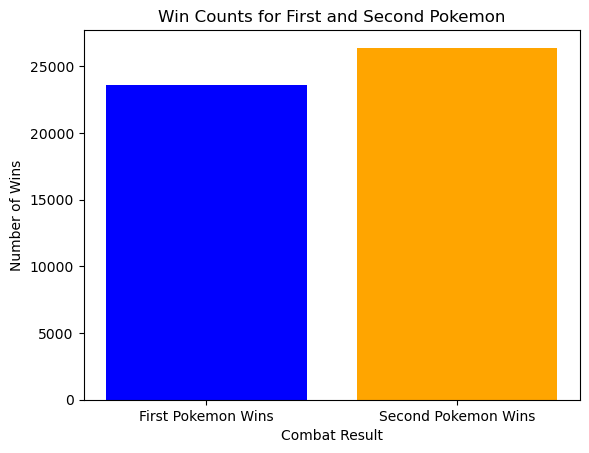

In [29]:
# Calculating the number of wins achieved by the First_pokemon and the Second_pokemon
first_pokemon_wins = (combats['First_pokemon'] == combats['Winner']).sum()
second_pokemon_wins = (combats['Second_pokemon'] == combats['Winner']).sum()

# Data for the bar chart
labels = ['First Pokemon Wins', 'Second Pokemon Wins']
wins = [first_pokemon_wins, second_pokemon_wins]

# Create the bar chart
plt.bar(labels, wins, color=['blue', 'orange'])
plt.xlabel('Combat Result')
plt.ylabel('Number of Wins')
plt.title('Win Counts for First and Second Pokemon')

# Save the chart to a file
plt.savefig('pokemon_combat_chart.png')

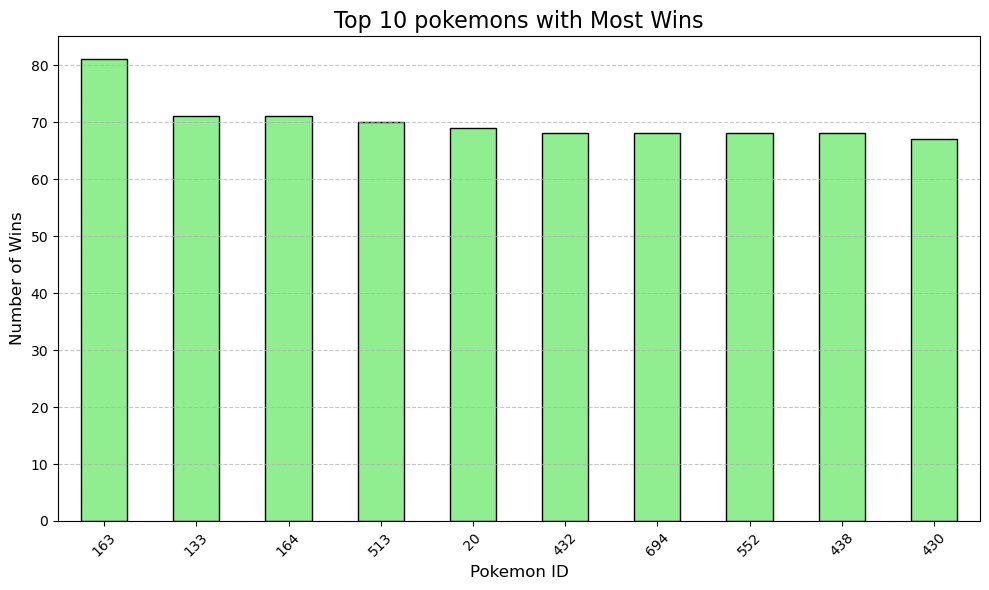

In [39]:
pokemon_wins = combats[combats['Winner'] == combats['First_pokemon']]['First_pokemon'].value_counts() # Calculating the TOP 10 pokemons by thei wins

top_10_pokemon_wins = pokemon_wins.head(10)

# Plot the results
plt.figure(figsize=(10, 6))
top_10_first_pokemon_wins.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 pokemons with Most Wins', fontsize=16)
plt.xlabel('Pokemon ID', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()